# <center> Vježba 4: Osciloskop i RC-krug </center>
   
## <center> Matija Pajas </center>

In [1]:
from scipy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

from IPython.display import HTML
from IPython.display import display

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Pokaži/sakrij kod"></form>''')

In [3]:
display(HTML("""
<style>
.output {
    display: block;
    align-items: center;
    text-align: center;
}
td {
  text-align: center;
  vertical-align: middle;
}
</style>
"""))

### Zadatak 2:
<b> Sastavite serijski RC-spoj i promatrajte istodobno napon izvora i napon na krajevima otpornika. Sami
pronađite optimalnu frevenciju za pouzdano određivanje faznog pomaka (npr. 5 kHz). Osciloskopom
izmjerite period, amplitude napona te njihov fazni pomak. Pogledajte XY-prikaz signala.
</b>

Nakon što je spojen RC krug, bilo je potrebno baždariti prikaz oba kanala na osciloskopu pomoću opcije <b>GND</b> (ground) koja prikazuje horizontalnu liniju na ekranu osciloskopa i kotačićem za vertikalni pomak namjestiti da se poklapa sa horizontalnom osi osciloskopa kako bi se mogle očitati amplitude napona. Za očitavanje perioda i faznog pomaka bilo je potrebno namjestiti horizontalni pomak sa kotačićem za horizontalni pomak, kako bi se namjestio presjek signala sa vertikalnom osi na poželjno mjesto za lakše očitavanje.

Nakon toga izmjerene su vrijednosti amplitude napona $U$, perioda $T$ i vremenska razlika $t$ na frekvenciji od 5 kHz uz grubo pretpostavljene pogreške mjerenja $M_U$, $M_T$ i $M_t$ za izvor koji je spojen na CH1 te RC-spoj koji je spojen na CH2.

Podaci spomenutog mjerenja mogu se pronaći u idućoj tablici:

In [4]:
d = {"$U$ / $\mathrm{V}$": [4.8,1.3,"-"], "$T$ / $\mathrm{\mu s}$": [200,160,"-"],
     "$M_U$ / $\mathrm{V}$": [0.2,0.2,"-"],"$M_T$ / $\mathrm{\mu s}$": [10,10,"-"],
    "$t$ / $\mathrm{\mu s}$": ["-","-",4], "$M_t$ / $\mathrm{\mu s}$": ["-","-",1]}
df = pd.DataFrame(data=d,index=["Izvor","RC-spoj","Vremenska razlika"])

dftohtml = df.to_html(col_space=12,decimal=',')

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$U$ / $\mathrm{V}$</th>
      <th style="min-width: 12;">$T$ / $\mathrm{\mu s}$</th>
      <th style="min-width: 12;">$M_U$ / $\mathrm{V}$</th>
      <th style="min-width: 12;">$M_T$ / $\mathrm{\mu s}$</th>
      <th style="min-width: 12;">$t$ / $\mathrm{\mu s}$</th>
      <th style="min-width: 12;">$M_t$ / $\mathrm{\mu s}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">Izvor</th>
      <td>4,8</td>
      <td>200</td>
      <td>0,2</td>
      <td>10</td>
      <td>-</td>
      <td>-</td>
    </tr>
    <tr>
      <th style="min-width: 12;">RC-spoj</th>
      <td>1,3</td>
      <td>160</td>
      <td>0,2</td>
      <td>10</td>
      <td>-</td>
      <td>-</td>
    </tr>
    <tr>
      <th style="min-width: 12;">Vremenska razlika</th>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>4</td>
      <td>1</td>
    </tr>
  </tbody>
</table>


In [5]:
phi = 4/160 * 2*np.pi
phi_nepouzdanost = phi * np.sqrt(((10**2)/(160**2)) + ((1)/(4**2)))

Pomoću vremenske razlike između signala možemo izračunati fazni pomak na sljedeći način:

$$\phi = \frac{t}{T}2\pi = 0,15707963267948966 \ \mathrm{rad}$$

Njegova nepouzdanost također se mora izračunati:

$$\\
\begin{align}
M_{\phi}
&=&\sqrt{\left ( \frac{\partial \phi }{\partial T}M_{T} \right )^{2}+\left ( \frac{\partial \phi }{\partial t}M_{t} \right )^{2}} \\
&=&\sqrt{\left ( -\frac{2\pi t}{T^{2}}M_{T} \right )^{2}+\left ( \frac{2\pi}{T}M_{t} \right )^{2}} \\
&=&\sqrt{\frac{4\pi^{2} t^{2}}{T^{2}}\frac{M^{2}_{T}}{T^{2}}+\frac{4\pi^{2} t^{2}}{T^{2}}\frac{M^{2}_{t}}{t^{2}}} \\
&=&\phi\sqrt{\frac{M_{T}^{2}}{T^{2}}+\frac{M_{t}^{2}}{t^{2}}} \\ 
&=& 0,04047849482317247  \ \mathrm{rad}
\end{align}$$

Te je konačan rezultat nakon zaokruživanja: $$\phi = (0,16 \pm 0,04) \ \mathrm{rad}$$

### Zadatak 3 pod (b):

<b>
Za male frekvencije funkcija arkus kotangens kojom bismo odredili fazu iz relacije (6) može se aproksimirati
(zadržavanjem prvih članova iz razvoja u red) kao:
</b>
    
$$ \phi = \arctan(\omega RC) \approx \frac{\pi}{2} - \omega RC $$

<b>
Mijenjajte frekvenciju izvora i na osciloskopu očitavajte fazni pomak $\phi$ te odmah iscrtavajte točke u
$\omega - \phi$ grafu. Za sada fazu možete grubo iščitavati jer nas samo zanima iz ovog grafa naoko identificirati
frekventno područje u kojem vrijedi linearizacija iz (7). Jednom kad ste odredili maksimalnu
frekvenciju do koje vrijedi linearna aproksimacija, unutar tog područja za desetak različitih frekvencija
provedite finije iščitavanje faze $\phi$ te metodom najmanjih kvadrata odredite vrijednost konstante $\tau = RC$
</b>

Prilikom određivanja linearnog područja trebalo je ugrubo proći kroz više frekvencija i otprilike nacrtati točke na grafu. Nakon mjerenja u rasponu $500 \ \mathrm{Hz} - 7000 \ \mathrm{Hz}$ zaključio sam da bi se linearna aproksimacija trebala nalaziti otprilike na području $1 \ \mathrm{kHz} - 2 \ \mathrm{kHz}$.

Izraz naveden u zadatku možemo prepoznati kao jednadžbu pravca te nam je cilj pomoću njega odrediti vrijednost $\tau$.
Jednom kada je izračunat pravac koji opisuje podatke iz tablice niže, lako se mogu prepoznati fizikalne vrijednosti koje smo mjerili unutar dobivenog pravca.

Vrijednosti faznog pomaka su izračunate prilikom očitavanja sa osciloskopa i odmah upisane u tablicu.

In [6]:
freq = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]
phi = [0.7162831250184728,0.6981317007977318,0.6829473363053812,0.6499606134426884,0.6283185307179586,
        0.5235987755982988,0.5089380098815465,0.49567350756638956,0.5235987755982988,0.44575709095935173,0.41085050591946515]

omega = []
    
for num in freq:
    omega.append(num*2*np.pi)
    
d = {"$f$ / $\mathrm{Hz}$": freq, "$\omega$ / $\mathrm{rad \cdot s^{-1}}$": omega, "$\phi$ / $\mathrm{rad}$": phi}
df = pd.DataFrame(data=d)

pars,cov=curve_fit(lambda x,a,b: a*x+b , omega,phi)

a=pars[0]
b=pars[1]

x_fit=linspace(100,15000)
y_fit=a*x_fit+b

dftohtml = df.to_html(col_space=12,decimal=',')

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$f$ / $\mathrm{Hz}$</th>
      <th style="min-width: 12;">$\omega$ / $\mathrm{rad \cdot s^{-1}}$</th>
      <th style="min-width: 12;">$\phi$ / $\mathrm{rad}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">0</th>
      <td>1000</td>
      <td>6283,185307</td>
      <td>0,716283</td>
    </tr>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>1100</td>
      <td>6911,503838</td>
      <td>0,698132</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>1200</td>
      <td>7539,822369</td>
      <td>0,682947</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>1300</td>
      <td>8168,140899</td>
      <td>0,649961</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>1400</td>
      <td>8796,459430</td>
      <td>0,628319</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>1500</td>
      <td>9424,777961</td>
      <td>0,523599</td>
    </tr>
    <tr>
      <th style="min-width: 12;">6</th>
      <td>1600</td>
      <td>10053,096491</td>
      <td>0,508938</td>
    </tr>
    <tr>
      <th style="min-width: 12;">7</th>
      <td>1700</td>
      <td>10681,415022</td>
      <td>0,495674</td>
    </tr>
    <tr>
      <th style="min-width: 12;">8</th>
      <td>1800</td>
      <td>11309,733553</td>
      <td>0,523599</td>
    </tr>
    <tr>
      <th style="min-width: 12;">9</th>
      <td>1900</td>
      <td>11938,052084</td>
      <td>0,445757</td>
    </tr>
    <tr>
      <th style="min-width: 12;">10</th>
      <td>2000</td>
      <td>12566,370614</td>
      <td>0,410851</td>
    </tr>
  </tbody>
</table>

Ako je jednadžba pravca u obliku

$$ y = ax + b $$

Iz zadane jednadžbe možemo prepoznati:


$$
\begin{align}
y &= \phi \\
x &= \omega \\
a &= -RC \\
b &= \frac{\pi}{2}
\end{align}
$$

A obzirom da je $\tau = RC$, prepoznajemo da možemo odrediti $\tau = -a$, a prema tome $M_{\tau}$ je isto što i $M_a$.

a = -4.981060599855147e-05 ± 4.210733114193556e-06
b = 1.0407318990645809 ± 0.040557531616653215


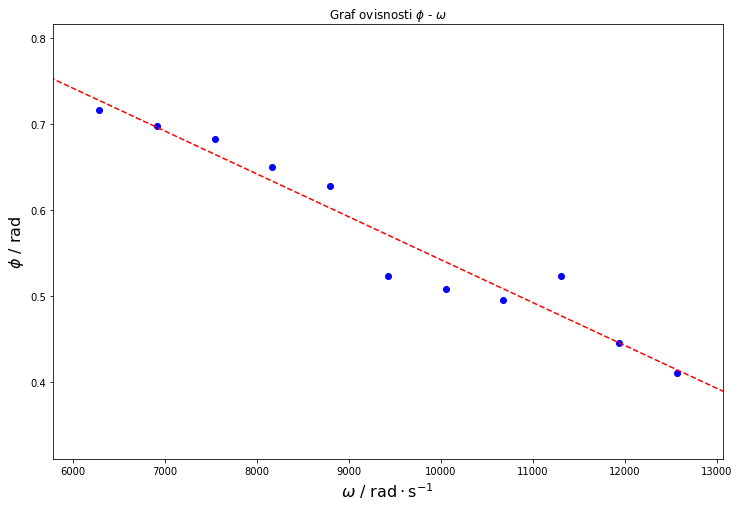

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(omega,phi, color="blue")
plt.plot(x_fit,y_fit, color="red", linestyle="--")
plt.xlim(min(omega)-500,max(omega)+500)
plt.ylim(min(phi)-0.1,max(phi)+0.1);
plt.title("Graf ovisnosti $\phi$ - $\omega$")
plt.xlabel("$\omega$ / $\mathrm{rad \cdot s^{-1}}$",fontsize=16)
plt.ylabel("$\phi$ / $\mathrm{rad}$",fontsize=16);
print("a =", pars[0],"±", sqrt(cov[0,0]))
print("b =",pars[1],"±", sqrt(cov[1,1]))

Iz dobivenih koeficijenata dobivenog pravca
$$
\begin{align}
a &= -0,000049 \pm 0,000004 \\
b &= 1,04 \pm 0,04
\end{align}
$$

Očitamo $\tau$:
$$
\tau = (4,9 \pm 0,4) \times 10^{-5} \ \mathrm{s}
$$

### Zaključak:
Treba primjetiti kako dobiveni pravac nije baš u najboljem slaganju sa izvedenom jednadžbom
$$ \phi = \arctan(\omega RC) \approx \frac{\pi}{2} - \omega RC $$
obzirom da naš presjek sa y osi $b = 1,04 \pm 0,04 $ prilično odstupa od izračunatoga $\frac{\pi}{2} \approx 1,570796\dots$ no smatram da je svejedno prilično dobra aproksimacija tražene veličine $\tau$ u području u kojem vrijedi linearizacija uzeći u obzir ljudsku grešku mjerenja koja može biti prilično velika u slučaju osciloskopa.